In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import cv2

from IPython import display

from imutils.object_detection import non_max_suppression
from imutils import paths
import argparse
import imutils


# 21 task

In [4]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# loop over the image paths
imagePaths = list(paths.list_images('/Users/kolsha/Documents/Projects/Python/sai_processing/pedestrian-detection/images/'))

<Figure size 432x288 with 0 Axes>

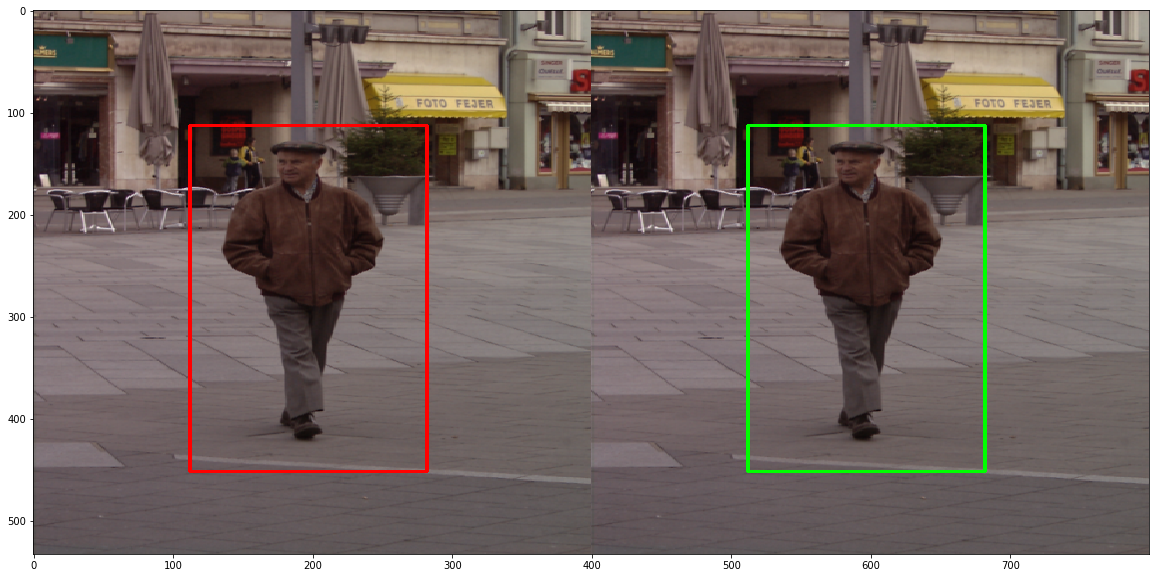

KeyboardInterrupt: 

In [10]:
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = imutils.resize(image, width=min(400, image.shape[1]))
    orig = image.copy()

    # detect people in the image
    (rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
        padding=(8, 8), scale=1.05)

    # draw the original bounding boxes
    for (x, y, w, h) in rects:
        cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # apply non-maxima suppression to the bounding boxes using a
    # fairly large overlap threshold to try to maintain overlapping
    # boxes that are still people
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

    # draw the final bounding boxes
    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

    # show some information on the number of bounding boxes
    filename = imagePath[imagePath.rfind("/") + 1:]
    print("[INFO] {}: {} original boxes, {} after suppression".format(
        filename, len(rects), len(pick)))

    img = np.concatenate((orig, image), axis=1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (20,10))
    #plt.title(frame_id)
    plt.imshow(img, aspect='auto')
    #plt.imshow(image, aspect='auto')
    plt.draw()
    plt.pause(2)   
    display.display(plt.gcf())
    display.clear_output(wait=True)